# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

In [2]:
dataset = pd.read_csv('datasets/50_Startups.csv')

In [3]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(X[:5])

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]


# Clean data

In [6]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X[:, 0:3])
X[:, 0:3] = imp_mean.transform(X[:, 0:3])
print(X[:5])

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]


# Encode categorical data

## Encoding independent variable

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [8]:
ct = ColumnTransformer( [
                ("encoder", OneHotEncoder(), [3])
            ], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print('feature_columns', ct.get_feature_names())
print(X[:5])

feature_columns ['encoder__x0_California', 'encoder__x0_Florida', 'encoder__x0_New York', 'x0', 'x1', 'x2']
[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


# Split data between train and test

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=1)

# Create model

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
train_predictions = lr.predict(X_train)
test_predictions = lr.predict(X_test)

# Plotting

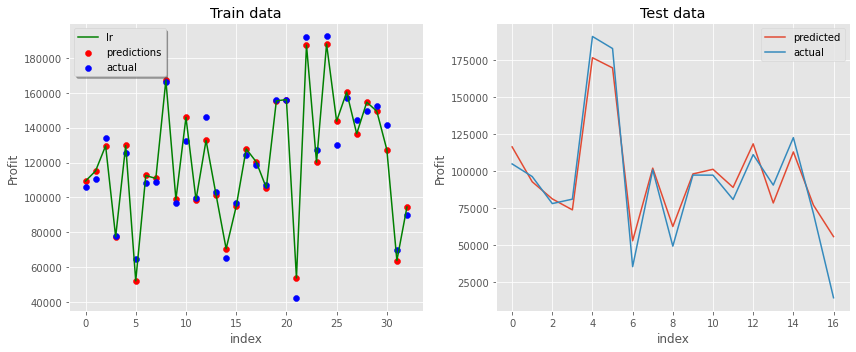

In [13]:
from matplotlib import gridspec
plt.style.use('ggplot')

fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1,1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax1.scatter(np.arange(0,len(X_train)), train_predictions, c='r', label='predictions')
ax1.scatter(np.arange(0,len(X_train)), y_train, c='b', label='actual')
ax1.plot(np.arange(0,len(X_train)), train_predictions, c='g', label='lr')
ax1.set_xlabel('index')
ax1.set_ylabel('Profit')
ax1.set_title('Train data')
# ax1.legend(loc='upper left', bbox_to_anchor=(1,1))
ax1.legend(shadow=True)


ax2.plot(np.arange(0,len(X_test)), test_predictions, label='predicted')
ax2.plot(np.arange(0,len(X_test)), y_test, label='actual')
ax2.set_xlabel('index')
ax2.set_ylabel('Profit')
ax2.set_title('Test data')
ax2.legend()

plt.tight_layout()

# Checking coefficients and intercept

trying to create the line equation

In [17]:
print('lr coefficients', lr.coef_)
print('lr intercept', lr.intercept_)
print('coeff with features', list(zip(ct.get_feature_names(), lr.coef_)))

lr coefficients [ 2.09109564e+03 -1.49872800e+03 -5.92367640e+02  7.19814259e-01
 -1.79470419e-02  3.74987995e-02]
lr intercept 54256.14598463764
coeff with features [('encoder__x0_California', 2091.09564358541), ('encoder__x0_Florida', -1498.7280035108613), ('encoder__x0_New York', -592.3676400993115), ('x0', 0.7198142593607031), ('x1', -0.017947041874776914), ('x2', 0.03749879950032664)]


In [15]:
print('line equation would be')
features = ct.get_feature_names()
# reshaping the arrays to vertical then concatenating along columns to create pandas dataframe like nd array
cated = np.concatenate((np.reshape(lr.coef_, (len(lr.coef_),1)), np.reshape(features, (len(features),1))), axis=1)
multiplied = ['X'.join(x) for x in cated]
equation = ' + '.join(multiplied)
print('prediction = ', equation)

lr coefficients [ 2.09109564e+03 -1.49872800e+03 -5.92367640e+02  7.19814259e-01
 -1.79470419e-02  3.74987995e-02]
lr intercept 54256.14598463764
coeff with features [('encoder__x0_California', 2091.09564358541), ('encoder__x0_Florida', -1498.7280035108613), ('encoder__x0_New York', -592.3676400993115), ('x0', 0.7198142593607031), ('x1', -0.017947041874776914), ('x2', 0.03749879950032664)]
line equation would be
prediction =  2091.09564358541Xencoder__x0_California + -1498.7280035108613Xencoder__x0_Florida + -592.3676400993115Xencoder__x0_New York + 0.7198142593607031Xx0 + -0.017947041874776914Xx1 + 0.03749879950032664Xx2


# Evaluating model score

In [16]:
lr.score(X_test, y_test)

0.8989116927519584

# Exploratory analysis

In [18]:
import seaborn as sns

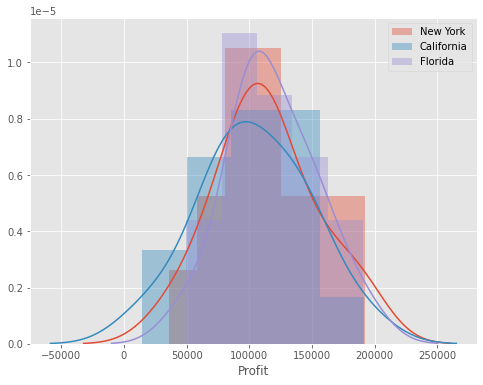

In [71]:
fig = plt.figure(figsize=(8,6))
ax1 = sns.distplot(dataset[dataset['State']=='New York']['Profit'], label='New York')
ax2 = sns.distplot(dataset[dataset['State']=='California']['Profit'], label='California')
ax3 = sns.distplot(dataset[dataset['State']=='Florida']['Profit'], label='Florida')
ax1.legend()
ax2.legend()
ax3.legend()
# fig.show()

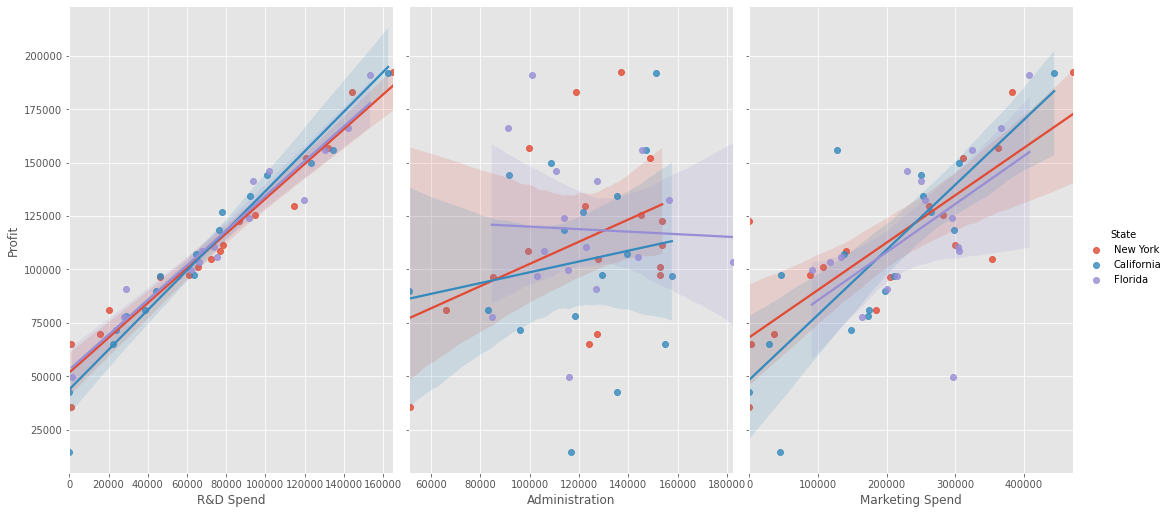

In [27]:
sns.pairplot(dataset, x_vars=['R&D Spend', 'Administration', 'Marketing Spend'],
             y_vars=['Profit'],
             hue='State',
             height=7, aspect=0.7, kind='reg')